## Data Cleaning

#### Agregacion de datos por categoria

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
genero= ['male','female']
ingresos = ['bajo','media','rico']

In [3]:
n=500
gender_data=[]
income_data=[]

for i in range(500):
    gender_data.append(np.random.choice(genero))
    income_data.append(np.random.choice(ingresos))

In [4]:
gender_data[1:10]

['female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female']

In [5]:
income_data[1:10]

['bajo', 'bajo', 'bajo', 'rico', 'rico', 'bajo', 'rico', 'rico', 'media']

In [6]:
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500*  np.random.randn(n)

In [7]:
data = pd.DataFrame({
    'gender' : gender_data,
    'Economic Status' : income_data,
    'Height' : height,
    'weight' : weight,
    'age' : age,
    'income' : income
})

In [8]:
data.head()

,gender,Economic Status,Height,weight,age,income
0,male,bajo,190.545661,72.029382,43.915431,17840.571652
1,female,bajo,129.841205,50.575759,35.700893,12970.661806
2,male,bajo,127.705812,79.598322,14.385876,13169.659699
3,male,bajo,187.548391,30.220840,25.380615,22567.098005
4,male,rico,123.564786,100.341022,40.674823,14828.077636


In [9]:
data['age']= data.age.astype(int)
data['age']

0      43
1      35
2      14
3      25
4      40
       ..
495    16
496    23
497    37
498    39
499    31
Name: age, Length: 500, dtype: int32

In [10]:
data.head()

,gender,Economic Status,Height,weight,age,income
0,male,bajo,190.545661,72.029382,43,17840.571652
1,female,bajo,129.841205,50.575759,35,12970.661806
2,male,bajo,127.705812,79.598322,14,13169.659699
3,male,bajo,187.548391,30.220840,25,22567.098005
4,male,rico,123.564786,100.341022,40,14828.077636


In [11]:
obj=data['age'].astype(str)
obj

0      43
1      35
2      14
3      25
4      40
       ..
495    16
496    23
497    37
498    39
499    31
Name: age, Length: 500, dtype: object

## Agrupacion de datos

In [12]:
grouped_gender=data.groupby('gender')

In [13]:
grouped_gender.groups['female']

Int64Index([  1,   5,   8,   9,  11,  15,  16,  24,  25,  28,
            ...
            480, 483, 487, 489, 490, 491, 493, 494, 496, 497],
           dtype='int64', length=252)

In [14]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

female
     gender Economic Status      Height     weight  age        income
1    female            bajo  129.841205  50.575759   35  12970.661806
5    female            rico  211.550727  80.069468   20  20056.303613
8    female            rico  140.500602  83.274137   32  25614.838232
9    female           media  135.577635  66.786992   45  18399.313153
11   female           media  182.135978  39.548869   24  12084.111275
..      ...             ...         ...        ...  ...           ...
491  female            rico  140.834407  87.848996   23  20513.335909
493  female            bajo  223.646484  79.585212   20  15081.159004
494  female            bajo  117.695628  45.919194   22  12275.610624
496  female           media  220.830741  70.941156   23  22325.199752
497  female            rico  118.644213  86.154710   37   9676.703888

[252 rows x 6 columns]
male
    gender Economic Status      Height      weight  age        income
0     male            bajo  190.545661   72.029382   4

In [15]:
grouped_gender.get_group('female')

,gender,Economic Status,Height,weight,age,income
1,female,bajo,129.841205,50.575759,35,12970.661806
5,female,rico,211.550727,80.069468,20,20056.303613
8,female,rico,140.500602,83.274137,32,25614.838232
9,female,media,135.577635,66.786992,45,18399.313153
11,female,media,182.135978,39.548869,24,12084.111275
...,...,...,...,...,...,...
491,female,rico,140.834407,87.848996,23,20513.335909
493,female,bajo,223.646484,79.585212,20,15081.159004
494,female,bajo,117.695628,45.919194,22,12275.610624
496,female,media,220.830741,70.941156,23,22325.199752


In [16]:
double_grouped= data.groupby(['gender','Economic Status'])
double_grouped

In [17]:
for names, groups in double_grouped:
    print(names)
    print(groups)

('female', 'bajo')
     gender Economic Status      Height     weight  age        income
1    female            bajo  129.841205  50.575759   35  12970.661806
15   female            bajo  215.942971  41.556245   22  17310.879837
30   female            bajo   66.394137  39.407167   33  21889.042301
32   female            bajo  126.090317  29.143401   25  16942.697719
35   female            bajo  139.175265  52.100781   29  13699.217065
..      ...             ...         ...        ...  ...           ...
479  female            bajo  157.502772  -6.340987   29  19845.967697
483  female            bajo  137.911571  55.667244   33  13938.622641
487  female            bajo  136.628299  55.217084   36  19125.440911
493  female            bajo  223.646484  79.585212   20  15081.159004
494  female            bajo  117.695628  45.919194   22  12275.610624

[92 rows x 6 columns]
('female', 'media')
     gender Economic Status      Height      weight  age        income
9    female           media

## Operaciones sobra datos agrupados

In [18]:
double_grouped.sum()

Height       weight   age        income
gender Economic Status                                               
female bajo             14456.056438  5933.627398  2922  1.623425e+06
       media            12252.140239  4511.771598  2169  1.319430e+06
       rico             14132.542799  5507.919113  2310  1.518197e+06
male   bajo             13395.976403  5500.580996  2372  1.533416e+06
       media            13890.988457  5920.938209  2414  1.634608e+06
       rico             12037.266153  4596.685806  2319  1.376457e+06

In [19]:
double_grouped.mean()

Height     weight        age        income
gender Economic Status                                                
female bajo             157.131048  64.495950  31.760870  17645.929293
       media            165.569463  60.969886  29.310811  17830.136133
       rico             164.331893  64.045571  26.860465  17653.452965
male   bajo             159.475910  65.483107  28.238095  18254.957367
       media            154.344316  65.788202  26.822222  18162.309893
       rico             162.665759  62.117376  31.337838  18600.768530

In [20]:
double_grouped.size()

gender  Economic Status
female  bajo               92
        media              74
        rico               86
male    bajo               84
        media              90
        rico               74
dtype: int64

In [21]:
double_grouped.describe()

Height                                                 \
                        count        mean        std         min         25%   
gender Economic Status                                                         
female bajo              92.0  157.131048  31.855701   66.394137  135.582712   
       media             74.0  165.569463  26.197133  108.563846  150.961047   
       rico              86.0  164.331893  30.575288   93.777000  145.187349   
male   bajo              84.0  159.475910  29.777308   89.927080  138.295390   
       media             90.0  154.344316  31.491819   86.375156  136.710229   
       rico              74.0  162.665759  29.088862   99.937479  144.169435   

                                                           weight             \
                               50%         75%         max  count       mean   
gender Economic Status                                                         
female bajo             156.766633  180.650541  225.898544   92.0  64.495950   
       media            163.656179  184.973734  229.268079   74.0  60.969886   
       rico             163.420817  187.546159  224.264628   86.0  64.045571   
male   bajo             162.350407  184.033899  219.755005   84.0  65.483107   
       media            157.249718  174.543297  216.723622   90.0  65.788202   
       rico             159.865551  179.925176  234.563458   74.0  62.117376   

                        ...    age       income                             \
                        ...    75%   max  count          mean          std   
gender Economic Status  ...                                                  
female bajo             ...  40.25  69.0   92.0  17645.929293  3374.639065   
       media            ...  38.00  53.0   74.0  17830.136133  2963.401846   
       rico             ...  34.00  51.0   86.0  17653.452965  3549.817788   
male   bajo             ...  36.50  56.0   84.0  18254.957367  3303.263014   
       media            ...  34.75  63.0   90.0  18162.309893  3760.274102   
       rico             ...  41.50  60.0   74.0  18600.768530  3854.014079   

                                                                  \
                                 min           25%           50%   
gender Economic Status                                             
female bajo              8649.707266  15511.467346  17821.784186   
       media            11050.276191  15827.819725  17891.039736   
       rico              9676.703888  15095.400039  17796.294475   
male   bajo             10661.968965  15898.897211  18441.840832   
       media            10972.612671  14705.655733  18466.662551   
       rico              5198.913667  15907.733635  19216.865081   

                                                    
                                 75%           max  
gender Economic Status                              
female bajo             20512.411659  24354.982995  
       media            19844.207308  24473.935418  
       rico             20136.571000  25614.838232  
male   bajo             20728.411846  27408.386468  
       media            20701.808337  28812.325941  
       rico             20794.182766  26087.945925  

[6 rows x 32 columns]

In [22]:
g_income=double_grouped['income']
g_income.describe()

count          mean          std           min  \
gender Economic Status                                                   
female bajo              92.0  17645.929293  3374.639065   8649.707266   
       media             74.0  17830.136133  2963.401846  11050.276191   
       rico              86.0  17653.452965  3549.817788   9676.703888   
male   bajo              84.0  18254.957367  3303.263014  10661.968965   
       media             90.0  18162.309893  3760.274102  10972.612671   
       rico              74.0  18600.768530  3854.014079   5198.913667   

                                 25%           50%           75%           max  
gender Economic Status                                                          
female bajo             15511.467346  17821.784186  20512.411659  24354.982995  
       media            15827.819725  17891.039736  19844.207308  24473.935418  
       rico             15095.400039  17796.294475  20136.571000  25614.838232  
male   bajo             15898.897211  18441.840832  20728.411846  27408.386468  
       media            14705.655733  18466.662551  20701.808337  28812.325941  
       rico             15907.733635  19216.865081  20794.182766  26087.945925

In [23]:
double_grouped.aggregate(
    {
        'Income':np.sum,
        'Age' : np.mean,
        'Height' : np.std
    }
)

SpecificationError: nested renamer is not supported

In [ ]:
double_grouped.aggregate(
    {
        'age': np.mean.
        'height': lambda h: np.mean(h)/np.std(h) 
    }
)

In [ ]:
double_grouped.aggregate([np.sum,np.mean,np.std])

### Filtrado de datos

In [ ]:
double_grouped.sum()

In [ ]:
double_grouped['age'].filter(lambda x: x.sum()>2400)

#### Transformacion de variables

In [ ]:
zscore= lambda x: (x- x.mean())/x.std()

In [ ]:
z_group = double_grouped.transform(zscore)
z_group

In [ ]:
plt.hist(z_group['age'])

In [ ]:
fill_na_mean=lambda x: x.fillna(x.mean())

In [ ]:
double_grouped.transform(fill_na_mean)

#### Operaciones diversas

In [ ]:
double_grouped.head(1)

In [ ]:
double_grouped.nth(32)

In [ ]:
double_grouped.nth(82)

In [ ]:
data_sorted=data.sort_values(['age','income'])
data_sorted.head(5)

In [ ]:
age_grouped = data_sorted.groupby('gender')
age_grouped.head(1)

In [ ]:
age_grouped.tail(1)

# Training data & Testing data

In [24]:
data = pd.read_csv(r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\customer-churn-model\Customer Churn Model.txt')
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


## Dividir utilizando la dist normal 

In [26]:
a=np.random.randn(len(data))

(array([  8.,  43., 207., 568., 863., 837., 523., 215.,  62.,   7.]),
 array([-3.47888078, -2.78230823, -2.08573567, -1.38916312, -0.69259057,
         0.00398199,  0.70055454,  1.3971271 ,  2.09369965,  2.79027221,
         3.48684476]),
 <a list of 10 Patch objects>)

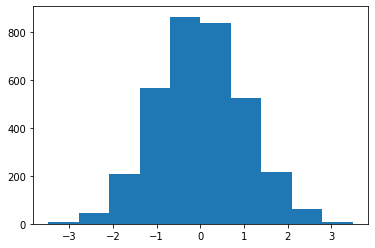

In [27]:
plt.hist(a)

In [28]:
check = (a<0.8)
check


array([ True,  True,  True, ..., False,  True,  True])

<BarContainer object of 2 artists>

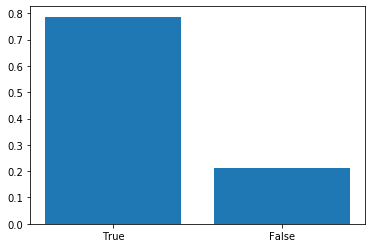

In [29]:
values=[np.count_nonzero(check==True)/len(check),np.count_nonzero(check==False)/len(check)]
names=['True','False']
plt.bar(names,values)

In [30]:
data.shape
check.shape

(3333,)

In [31]:
training = data[check]
testing = data[~check]

In [32]:
training.shape

(2622, 21)

In [33]:
testing.shape

(711, 21)

### Con la libreria sklearn

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train, test = train_test_split(data,  test_size = 0.2)

In [36]:
len(train)

2666

In [37]:
len(test)

667

### Usando la funcion suffle

In [38]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [39]:
import sklearn
data=sklearn.utils.shuffle(data)

In [40]:
train=data[:int(0.8*len(data))]
train

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
3243,AR,113,415,338-6714,yes,no,0,122.2,112,20.77,...,94,11.19,169.5,106,7.63,10.3,9,2.78,5,True.
3265,ID,82,415,408-1913,no,no,0,266.9,83,45.37,...,74,19.52,251.7,99,11.33,11.0,6,2.97,3,True.
1352,WA,136,415,359-2915,no,yes,16,90.4,105,15.37,...,109,17.11,227.1,115,10.22,13.1,4,3.54,0,False.
654,CA,96,510,341-4103,no,yes,31,183.4,126,31.18,...,106,16.62,180.1,93,8.10,10.5,5,2.84,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,WV,143,510,350-1354,no,no,0,202.8,109,34.48,...,104,14.09,143.9,71,6.48,4.6,4,1.24,1,False.
1863,TN,94,408,368-3117,yes,no,0,170.1,113,28.92,...,94,23.10,110.7,78,4.98,8.7,4,2.35,1,False.
2547,VT,72,415,336-9327,no,no,0,139.9,117,23.78,...,96,19.01,240.8,93,10.84,12.7,4,3.43,2,False.
3229,IL,117,415,372-1115,no,no,0,201.9,86,34.32,...,96,18.05,176.9,98,7.96,7.8,10,2.11,1,False.


In [41]:
test=data[int(0.8*len(data))+1:]
test

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2112,LA,150,415,381-4029,no,no,0,136.6,112,23.22,...,81,17.80,161.1,78,7.25,12.2,2,3.29,4,True.
2238,NE,61,408,420-8897,no,no,0,267.1,104,45.41,...,131,15.33,230.6,106,10.38,17.3,4,4.67,1,True.
319,SD,128,510,413-9269,yes,yes,32,223.5,81,38.00,...,74,16.05,154.9,101,6.97,9.4,2,2.54,2,True.
2314,VA,43,408,387-5411,no,yes,35,200.2,105,34.03,...,88,20.77,207.2,97,9.32,11.6,4,3.13,3,False.
1813,KY,89,408,341-1594,no,no,0,192.1,83,32.66,...,88,13.91,169.7,138,7.64,6.1,3,1.65,0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,IA,98,415,338-7886,no,no,0,216.8,86,36.86,...,114,16.22,187.5,79,8.44,11.0,9,2.97,0,False.
1890,OH,135,415,412-2947,no,no,0,218.8,123,37.20,...,64,20.64,85.8,80,3.86,10.3,3,2.78,4,False.
3067,WA,62,415,422-3454,no,no,0,100.0,98,17.00,...,95,14.75,218.0,122,9.81,10.1,4,2.73,0,False.
616,WA,166,408,416-5849,yes,yes,35,128.2,138,21.79,...,113,23.33,298.9,130,13.45,8.8,7,2.38,2,False.


## Concatenar dos datasets por filas

In [42]:
import pandas as pd

In [44]:
red_wine= pd.read_csv('D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\wine\winequality-red.csv',
    sep=';')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [45]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [47]:
white_wine = pd.read_csv('D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\wine\winequality-white.csv',
                        sep=';')
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [48]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

en python, tenemos dos tipos de ejes,
* axis = 0 horizontal
* axis = 1 vertical

In [49]:
wine_data = pd.concat([red_wine, white_wine], axis = 0)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [50]:
data1 = wine_data.head(10)
data2 = wine_data[300:310]
data3 = wine_data.tail(10)

In [ ]:
wine_scramble = pd.concat([data1,data2,data3], axis = 0)
wine_scramble

# carga de cientos de datos distribuidos

In [51]:
mainpath = r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\distributed-data/'


* importar el primer fichero
* Hacemos un bucle para recorrer todos los ficheros
    * importamos los ficheros uno a uno cada uno de ellos se apendiza (añade al final) al primero ya cargado  

In [52]:
data = pd.read_csv(mainpath + '001.csv')
final_lenght = len(data)

for i in range(2,333):
    if i<10:
        filename = '00'+str(i)
    if 10 <= i < 100:
        filename = '0'+str(i)
    if i>=100:
        filename = str(i)
    file= mainpath + filename + '.csv'
    temp_data = pd.read_csv(file)
    final_lenght += len(temp_data) 
    
    data=pd.concat([data,temp_data], axis = 0)

In [53]:
print(data)
final_lenght

           Date  sulfate  nitrate   ID
0    2003-01-01      NaN      NaN    1
1    2003-01-02      NaN      NaN    1
2    2003-01-03      NaN      NaN    1
3    2003-01-04      NaN      NaN    1
4    2003-01-05      NaN      NaN    1
..          ...      ...      ...  ...
726  2004-12-27      NaN      NaN  332
727  2004-12-28      NaN      NaN  332
728  2004-12-29      NaN      NaN  332
729  2004-12-30      NaN      NaN  332
730  2004-12-31      NaN      NaN  332

[772087 rows x 4 columns]


772087

### Join de datasets

In [54]:
filepath = r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\athletes'

In [55]:
data_main=pd.read_csv(filepath + '\Medals.csv', encoding = 'ISO-8859-1')
data_main

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6
...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1
8614,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1
8615,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1


In [56]:
a = data_main['Athlete'].unique().tolist()
len(a)

6956

In [57]:
data_main.shape

(8618, 8)

In [61]:
data_country= pd.read_csv(r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\athletes\Athelete_Country_Map.csv'
                          , encoding = 'ISO-8859-1')

In [62]:
 data_country

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
...,...,...
6965,Olena Sadovnycha,Ukraine
6966,Kateryna Serdiuk,Ukraine
6967,Wietse van Alten,Netherlands
6968,Sandra Wagner-Sachse,Germany


In [63]:
data_country[data_country['Athlete']=='Aleksandar Ciric']

,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [65]:
data_Sports= pd.read_csv(r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\athletes\Athelete_Sports_Map.csv'
                          , encoding = 'ISO-8859-1')

In [66]:
data_Sports

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming
...,...,...
6970,Olena Sadovnycha,Archery
6971,Kateryna Serdiuk,Archery
6972,Wietse van Alten,Archery
6973,Sandra Wagner-Sachse,Archery


In [67]:
data_Sports[(data_Sports['Athlete']=='Chen Jing') |  
            (data_Sports['Athlete']=='Richard Thompson') |
            (data_Sports['Athlete']=='Matt Ryan')]

,Athlete,Sport
528,Richard Thompson,Athletics
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis
2727,Matt Ryan,Rowing
5003,Matt Ryan,Equestrian
5691,Richard Thompson,Baseball


### Merge

In [69]:
data_main_country = pd.merge(left = data_main, right = data_country,
                            left_on='Athlete', right_on = 'Athlete')

In [70]:
data_main_country

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
...,...,...,...,...,...,...,...,...,...
8652,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1,Ukraine
8653,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1,Ukraine
8654,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1,Netherlands
8655,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1,Germany


In [71]:
data_main_country.shape

(8657, 9)

In [72]:
data_country_dp = data_country.drop_duplicates(subset='Athlete')
data_country_dp

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
...,...,...
6965,Olena Sadovnycha,Ukraine
6966,Kateryna Serdiuk,Ukraine
6967,Wietse van Alten,Netherlands
6968,Sandra Wagner-Sachse,Germany


In [73]:
data_main_country[data_main_country['Athlete'] == 'Aleksandar Ciric']

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1503,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1504,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1505,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1506,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1507,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1508,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


In [74]:
data_sports_dp = data_Sports.drop_duplicates(subset = 'Athlete')
data_sports_dp

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming
...,...,...
6970,Olena Sadovnycha,Archery
6971,Kateryna Serdiuk,Archery
6972,Wietse van Alten,Archery
6973,Sandra Wagner-Sachse,Archery


In [75]:
data_final = pd.merge(left=data_main_country, right=data_sports_dp,
                     left_on='Athlete', right_on='Athlete')
data_final

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming
...,...,...,...,...,...,...,...,...,...,...
8652,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1,Ukraine,Archery
8653,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1,Ukraine,Archery
8654,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1,Netherlands,Archery
8655,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1,Germany,Archery


# Tipos de Joins

In [76]:
import numpy as np
from IPython.display import Image

In [77]:
np.random.seed(1319)
out_atheletes=np.random.choice(data_main['Athlete'], size =  6, replace = False)
out_atheletes

array(['Chen Zhong', 'Suguru Awaji', 'Nataliya Shipilova', 'André Ward',
       'Oleksandr Hvozdyk', 'Susann Goksør-Bjerkrheim'], dtype=object)

In [78]:
data_country_dlt = data_country_dp[(~data_country_dp['Athlete'].isin(out_atheletes)) & 
                                   (data_country_dp['Athlete'] != 'Michael Phelps')]
data_country_dlt

,Athlete,Country
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
5,Ryan Lochte,United States
...,...,...
6965,Olena Sadovnycha,Ukraine
6966,Kateryna Serdiuk,Ukraine
6967,Wietse van Alten,Netherlands
6968,Sandra Wagner-Sachse,Germany


In [79]:
data_sports_dlt = data_sports_dp[(~data_sports_dp['Athlete'].isin(out_atheletes)) & 
                                   (data_sports_dp ['Athlete'] != 'Michael Phelps')]
data_main_dlt = data_main[(~data_main['Athlete'].isin(out_atheletes)) & 
                                   (data_main['Athlete'] != 'Michael Phelps')]
print(data_sports_dlt.shape)
data_main_dlt.shape

(6949, 2)


(8608, 8)

#### Inner join

- Devuelve un data frame con las filas que tienen valor tanto en el primer como en el segundo data 
frame que estamos uniendo 

- el numero de filas sera igual al numero de filas comunes que tengan ambps data sets
    - dataset A tiene 60 filas
    - dataset B tiene 50 filas
    - Ambos comparten 30 filas
    - entonces A inner join B tendra 30 filas
- en terminos de teoria de conjuntos, se trata de la interseccion de los dos conjuntos

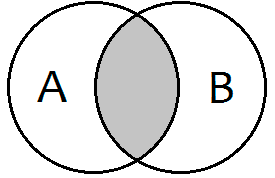

In [80]:
Image(filename = r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\notebooks\resources\inner-join.png')

In [81]:
# data_ain contiene toda la info
# data_country_dlt le falta la info de 7 atletas
merged_inner = pd.merge(left=data_main, right = data_country_dlt,
                       how = 'inner', left_on='Athlete', right_on= 'Athlete')
merged_inner

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia
...,...,...,...,...,...,...,...,...,...
8603,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1,Ukraine
8604,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1,Ukraine
8605,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1,Netherlands
8606,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1,Germany


#### Left Join

- Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, 
sin importar si tienen correspondencia en el de la derecha o no.

- Las filas del data frame dinal que no correspondan a ninguna fila del dataframe deecho, tendran
NAs en las columnas del dataframe derecho.

- el numero de filas sera igual al numero de filas del data frame izquierdo
    - data set A tiene 60 filas
    - data set B tiene 50 filas
    - entonces A left join B tendra 60 filas
-  en terminos de teoria de conjuntos se trata del propio data set de la izquierda quien, ademas tiene la interseccion

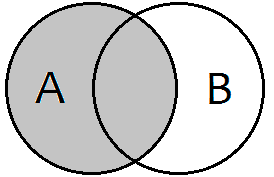

In [82]:
Image(filename=r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\notebooks\resources\left-join.png')

In [83]:
merged_left = pd.merge(left = data_main, right=data_country_dlt,
                      how = 'left', left_on = 'Athlete', right_on='Athlete')
merged_left

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1,Ukraine
8614,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1,Ukraine
8615,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1,Germany


#### Right Join

- devuelvo un dataframe con las filas que tuvieran callor en el dataset de la derecha, sin importar si tienen correspondencia en el de la izquierda o no.
- las filas del dataframe final que no correpondan a ninguna fila del dataframe izquierdo, tendran NAs en las columnas del tataframe izquierdo.
- el numero de filas sera igual al numero de filas del dataframe derecho
    - dataset A tiene 60 filas
    - dataset B tiene 50 filas
    - entonces A right join B tendra 50 filas
- en terminos con conjuntos, se trata del propio dataset de la izquierda quien, ademas la interseccion

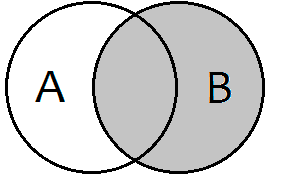

In [84]:
Image(filename= r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\notebooks\resources\right-join.png')

In [85]:
merged_right= pd.merge(left = data_main_dlt, right=data_country_dlt,
                      how = 'right', left_on='Athlete', right_on='Athlete')
merged_right

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia
...,...,...,...,...,...,...,...,...,...
8603,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1,Ukraine
8604,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1,Ukraine
8605,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1,Netherlands
8606,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1,Germany


#### Outer Join

- devuelve un data frame con todas las filas de ambos, reemplazan las ausencias de uno o de otro NAs en la region especifica...
- las filas del data frame final que no corrspondan a nuinguna fila del daraframe derecho (o izquierdo), tendran nas en las coliu,mnas del data frame derecho o izquierdo.
- el numero de filas sera igual almaximo numero de las filas de ambos dataframes
    - dataset A tiene 60 filas
    - data set B tiene50 ifilas
    - entonces A outer join B tendra 80 filas
- en terminos de teoria de conjuntos se trata de la union de conjuntos

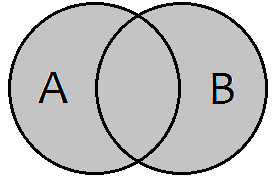

In [86]:
Image(filename=r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\notebooks\resources\outer-join.png')

In [87]:
data_country_mg=data_country_dlt.append(
{
    'Athlete': 'Marlon Gaviria Perez',
    'Country': 'Colombia'
}, ignore_index=True)

In [88]:
merged_outer = pd.merge(left=data_main, right=data_country_mg,
                        how = 'outer', left_on='Athlete', right_on='Athlete')
merged_outer

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008.0,08/24/2008,8.0,0.0,0.0,8.0,NaN
1,Michael Phelps,19.0,2004.0,08/29/2004,6.0,0.0,2.0,8.0,NaN
2,Michael Phelps,27.0,2012.0,08/12/2012,4.0,2.0,0.0,6.0,NaN
3,Natalie Coughlin,25.0,2008.0,08/24/2008,1.0,2.0,3.0,6.0,United States
4,Natalie Coughlin,21.0,2004.0,08/29/2004,2.0,2.0,1.0,5.0,United States
...,...,...,...,...,...,...,...,...,...
8614,Kateryna Serdiuk,17.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8615,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8617,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
